In [7]:
# import pathlib
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import re
#import random
#from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe


import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
#from string import ascii_letters
import seaborn as sns
import h5py as h5

#from string import ascii_letters

In [8]:
df =pd.read_pickle('../pickle_pd/pd_top_25.pkl')
features = ['lep_pt_2','lep_pt_1','jet_n','lep_E_1','jet_pt_0','lep_eta_0','jet_pt_1','lep_pt_0','lep_E_2','lep_eta_1','lep_phi_1','lep_phi_0',
            'lep_ptcone30_1','lep_ptcone30_0','jet_eta_0','jet_m','lep_E_0','jet_eta_1','jet_pt_2','lep_pt_3','jet_E_0','lep_charge_1','lep_charge_0','lep_E_3']

In [21]:
 X_train, X_test, y_train, y_test = train_test_split( df[features], df['label'], test_size=0.4, random_state=42,shuffle = True)
 X_test, X_val, y_test, y_val = train_test_split( X_test, y_test, test_size=0.5, random_state=42,shuffle = True)

In [10]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [11]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, #eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [12]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 50,
                        trials = trials)

  0%|                                          | 0/50 [00:00<?, ?trial/s, best loss=?]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7792821340093334                                                                    
  2%|▎              | 1/50 [00:16<13:47, 16.88s/trial, best loss: -0.7792821340093334]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7783411111751263                                                                    
  4%|▌              | 2/50 [00:34<13:51, 17.33s/trial, best loss: -0.7792821340093334]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7790708839853278                                                                    
  6%|▉              | 3/50 [00:54<14:35, 18.63s/trial, best loss: -0.7792821340093334]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7784755430085845                                                                    
  8%|█▏             | 4/50 [01:14<14:34, 19.00s/trial, best loss: -0.7792821340093334]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7793013385569703                                                                    
 10%|█▌             | 5/50 [01:42<16:40, 22.24s/trial, best loss: -0.7793013385569703]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7780914520558468                                                                    
 12%|█▊             | 6/50 [02:19<20:07, 27.45s/trial, best loss: -0.7793013385569703]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.778705997580227                                                                     
 14%|██             | 7/50 [02:57<22:03, 30.78s/trial, best loss: -0.7793013385569703]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7788788385089589                                                                    
 16%|██▍            | 8/50 [03:33<22:45, 32.51s/trial, best loss: -0.7793013385569703]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.778552361199132                                                                     
 18%|██▋            | 9/50 [04:09<22:51, 33.44s/trial, best loss: -0.7793013385569703]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7783027020798525                                                                    
 20%|██▊           | 10/50 [04:43<22:22, 33.57s/trial, best loss: -0.7793013385569703]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7788788385089589                                                                    
 22%|███           | 11/50 [05:18<22:15, 34.24s/trial, best loss: -0.7793013385569703]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7787636112231376                                                                    
 24%|███▎          | 12/50 [05:54<21:56, 34.66s/trial, best loss: -0.7793013385569703]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7786099748420426                                                                    
 26%|███▋          | 13/50 [06:29<21:23, 34.69s/trial, best loss: -0.7793013385569703]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7780722475082099                                                                    
 28%|███▉          | 14/50 [07:06<21:12, 35.36s/trial, best loss: -0.7793013385569703]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7781874747940313                                                                    
 30%|████▏         | 15/50 [07:43<21:01, 36.04s/trial, best loss: -0.7793013385569703]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7778225883889305                                                                    
 32%|████▍         | 16/50 [08:23<21:01, 37.11s/trial, best loss: -0.7793013385569703]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7782066793416681                                                                    
 34%|████▊         | 17/50 [09:00<20:28, 37.23s/trial, best loss: -0.7793013385569703]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7796470204144341                                                                    
 36%|█████         | 18/50 [09:44<20:57, 39.30s/trial, best loss: -0.7796470204144341]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7785907702944057                                                                    
 38%|█████▎        | 19/50 [10:23<20:10, 39.04s/trial, best loss: -0.7796470204144341]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7788212248660483                                                                    
 40%|█████▌        | 20/50 [11:02<19:35, 39.19s/trial, best loss: -0.7796470204144341]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7796278158667973                                                                    
 42%|█████▉        | 21/50 [11:32<17:35, 36.39s/trial, best loss: -0.7796470204144341]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7794549749380654                                                                    
 44%|██████▏       | 22/50 [12:01<15:53, 34.06s/trial, best loss: -0.7796470204144341]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7794741794857022                                                                    
 46%|█████      | 23/50 [28:26<2:23:44, 319.44s/trial, best loss: -0.7796470204144341]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7791092930806015                                                                    
 48%|█████▎     | 24/50 [44:43<3:43:52, 516.63s/trial, best loss: -0.7796470204144341]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7800311113671717                                                                    
 50%|█████▌     | 25/50 [45:03<2:33:16, 367.85s/trial, best loss: -0.7800311113671717]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7800119068195349                                                                    
 52%|█████▋     | 26/50 [55:17<2:56:39, 441.66s/trial, best loss: -0.7800311113671717]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7797430431526186                                                                    
 54%|█████▉     | 27/50 [55:33<2:00:19, 313.88s/trial, best loss: -0.7800311113671717]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7794165658427916                                                                    
 56%|██████▏    | 28/50 [55:49<1:22:16, 224.41s/trial, best loss: -0.7800311113671717]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7793781567475178                                                                    
 58%|███████▌     | 29/50 [56:07<56:53, 162.57s/trial, best loss: -0.7800311113671717]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7799158840813505                                                                    
 60%|███████▊     | 30/50 [56:23<39:34, 118.73s/trial, best loss: -0.7800311113671717]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7799158840813505                                                                    
 62%|████████▋     | 31/50 [56:42<28:04, 88.66s/trial, best loss: -0.7800311113671717]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7792821340093334                                                                    
 64%|████████▉     | 32/50 [57:01<20:21, 67.88s/trial, best loss: -0.7800311113671717]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7785715657467689                                                                    
 66%|█████████▏    | 33/50 [57:15<14:38, 51.68s/trial, best loss: -0.7800311113671717]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7792437249140597                                                                    
 68%|█████████▌    | 34/50 [57:33<11:06, 41.64s/trial, best loss: -0.7800311113671717]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7789748612471433                                                                    
 70%|█████████▊    | 35/50 [57:52<08:43, 34.87s/trial, best loss: -0.7800311113671717]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7797046340573448                                                                    
 72%|██████████    | 36/50 [58:09<06:52, 29.48s/trial, best loss: -0.7800311113671717]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7795702022238866                                                                    
 74%|██████████▎   | 37/50 [58:30<05:49, 26.91s/trial, best loss: -0.7800311113671717]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7794357703904284                                                                    
 76%|██████████▋   | 38/50 [58:55<05:16, 26.38s/trial, best loss: -0.7800311113671717]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7795702022238866                                                                    
 78%|██████████▉   | 39/50 [59:26<05:04, 27.65s/trial, best loss: -0.7800311113671717]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7794933840333391                                                                    
 80%|███████████▏  | 40/50 [59:53<04:34, 27.49s/trial, best loss: -0.7800311113671717]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7790132703424171                                                                    
 82%|█████████▊  | 41/50 [1:00:22<04:12, 28.07s/trial, best loss: -0.7800311113671717]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7791092930806015                                                                    
 84%|██████████  | 42/50 [1:00:53<03:49, 28.68s/trial, best loss: -0.7800311113671717]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7793205431046072                                                                    
 86%|██████████▎ | 43/50 [1:01:23<03:24, 29.22s/trial, best loss: -0.7800311113671717]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7791477021758753                                                                    
 88%|██████████▌ | 44/50 [1:01:44<02:39, 26.64s/trial, best loss: -0.7800311113671717]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7795317931286129                                                                    
 90%|██████████▊ | 45/50 [1:02:15<02:19, 27.91s/trial, best loss: -0.7800311113671717]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7798582704384398                                                                    
 92%|███████████ | 46/50 [1:02:50<02:00, 30.05s/trial, best loss: -0.7800311113671717]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.779839065890803                                                                     
 94%|███████████▎| 47/50 [1:03:21<01:31, 30.60s/trial, best loss: -0.7800311113671717]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7788212248660483                                                                    
 96%|███████████▌| 48/50 [1:03:45<00:57, 28.52s/trial, best loss: -0.7800311113671717]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.7791092930806015                                                                    
 98%|███████████▊| 49/50 [1:04:13<00:28, 28.41s/trial, best loss: -0.7800311113671717]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                
0.778398724818037                                                                     
100%|████████████| 50/50 [1:04:40<00:00, 77.61s/trial, best loss: -0.7800311113671717]


In [13]:
best_hyperparams

{'colsample_bytree': 0.7576375295176072,
 'gamma': 1.9649156900065439,
 'max_depth': 3.0,
 'min_child_weight': 7.0,
 'reg_alpha': 42.0,
 'reg_lambda': 0.42853588282269506}

In [14]:
xgb_model=xgb.XGBClassifier(
                    n_estimators =180, max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
                    reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
                    colsample_bytree=int(best_hyperparams['colsample_bytree']))         
xgb_model.fit(X_train[features],y_train,
             eval_set = [( X_train, y_train), ( X_test, y_test)])
#y_pred = xgb_model.predict(X_val[features])

[0]	validation_0-mlogloss:1.03990	validation_1-mlogloss:1.04026
[1]	validation_0-mlogloss:1.00416	validation_1-mlogloss:1.00492
[2]	validation_0-mlogloss:0.99056	validation_1-mlogloss:0.99132
[3]	validation_0-mlogloss:0.98072	validation_1-mlogloss:0.98177
[4]	validation_0-mlogloss:0.96831	validation_1-mlogloss:0.96931
[5]	validation_0-mlogloss:0.94244	validation_1-mlogloss:0.94277
[6]	validation_0-mlogloss:0.92796	validation_1-mlogloss:0.92854
[7]	validation_0-mlogloss:0.88775	validation_1-mlogloss:0.88852
[8]	validation_0-mlogloss:0.85968	validation_1-mlogloss:0.86060
[9]	validation_0-mlogloss:0.82873	validation_1-mlogloss:0.82965
[10]	validation_0-mlogloss:0.80931	validation_1-mlogloss:0.81029
[11]	validation_0-mlogloss:0.78940	validation_1-mlogloss:0.79040
[12]	validation_0-mlogloss:0.78116	validation_1-mlogloss:0.78187
[13]	validation_0-mlogloss:0.76953	validation_1-mlogloss:0.77010
[14]	validation_0-mlogloss:0.73310	validation_1-mlogloss:0.73307
[15]	validation_0-mlogloss:0.73049	

[126]	validation_0-mlogloss:0.51261	validation_1-mlogloss:0.51061
[127]	validation_0-mlogloss:0.51249	validation_1-mlogloss:0.51047
[128]	validation_0-mlogloss:0.51240	validation_1-mlogloss:0.51041
[129]	validation_0-mlogloss:0.51214	validation_1-mlogloss:0.51016
[130]	validation_0-mlogloss:0.51213	validation_1-mlogloss:0.51016
[131]	validation_0-mlogloss:0.51154	validation_1-mlogloss:0.50955
[132]	validation_0-mlogloss:0.51142	validation_1-mlogloss:0.50944
[133]	validation_0-mlogloss:0.51128	validation_1-mlogloss:0.50930
[134]	validation_0-mlogloss:0.51116	validation_1-mlogloss:0.50919
[135]	validation_0-mlogloss:0.51110	validation_1-mlogloss:0.50915
[136]	validation_0-mlogloss:0.51088	validation_1-mlogloss:0.50895
[137]	validation_0-mlogloss:0.51042	validation_1-mlogloss:0.50853
[138]	validation_0-mlogloss:0.51013	validation_1-mlogloss:0.50821
[139]	validation_0-mlogloss:0.51007	validation_1-mlogloss:0.50815
[140]	validation_0-mlogloss:0.50969	validation_1-mlogloss:0.50779
[141]	vali

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1.9649156900065439,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=180, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

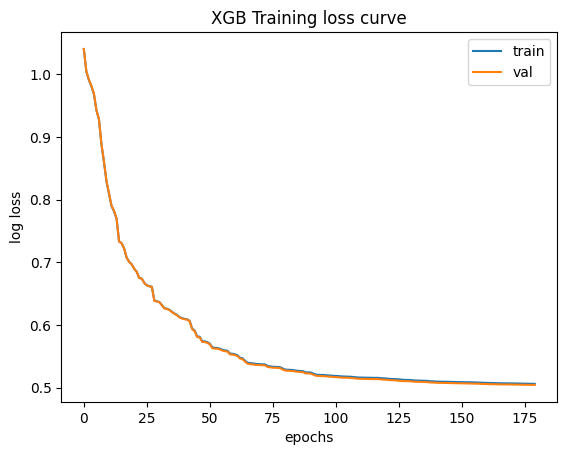

In [16]:
history  = xgb_model.evals_result()
plt.plot(history['validation_0']['mlogloss'], label='train')
plt.plot(history['validation_1']['mlogloss'], label='val')
plt.ylabel('log loss')
plt.xlabel('epochs')
plt.title('XGB Training loss curve')
plt.legend()

In [33]:
history  = xgb_model.evals_result()

In [37]:
history.keys()

dict_keys(['validation_0', 'validation_1'])

In [44]:
history['validation_0']

OrderedDict([('mlogloss',
              [1.0399692002773844,
               1.00419866181396,
               0.9905929694253238,
               0.9807697981072296,
               0.9683387530185,
               0.9424370312609233,
               0.9279077953881256,
               0.8877055154391522,
               0.8596715273170508,
               0.8281522927193247,
               0.8086586603957341,
               0.7886323518127453,
               0.7802785871180438,
               0.7686939942614591,
               0.7323234835028886,
               0.7296653050064387,
               0.7210796791732469,
               0.7065456719139472,
               0.6998802014790566,
               0.6958727798149587,
               0.688824408178666,
               0.683929603199748,
               0.6741873208323159,
               0.6733986114337582,
               0.666424404264281,
               0.6625964438918933,
               0.6611929366711541,
               0.6603340957213669,
  

In [1]:
plt.plot(history['validation_0']['mlogloss'], label='train')
plt.plot(history['validation_1']['mlogloss'], label='test')
plt.legend()

NameError: name 'plt' is not defined

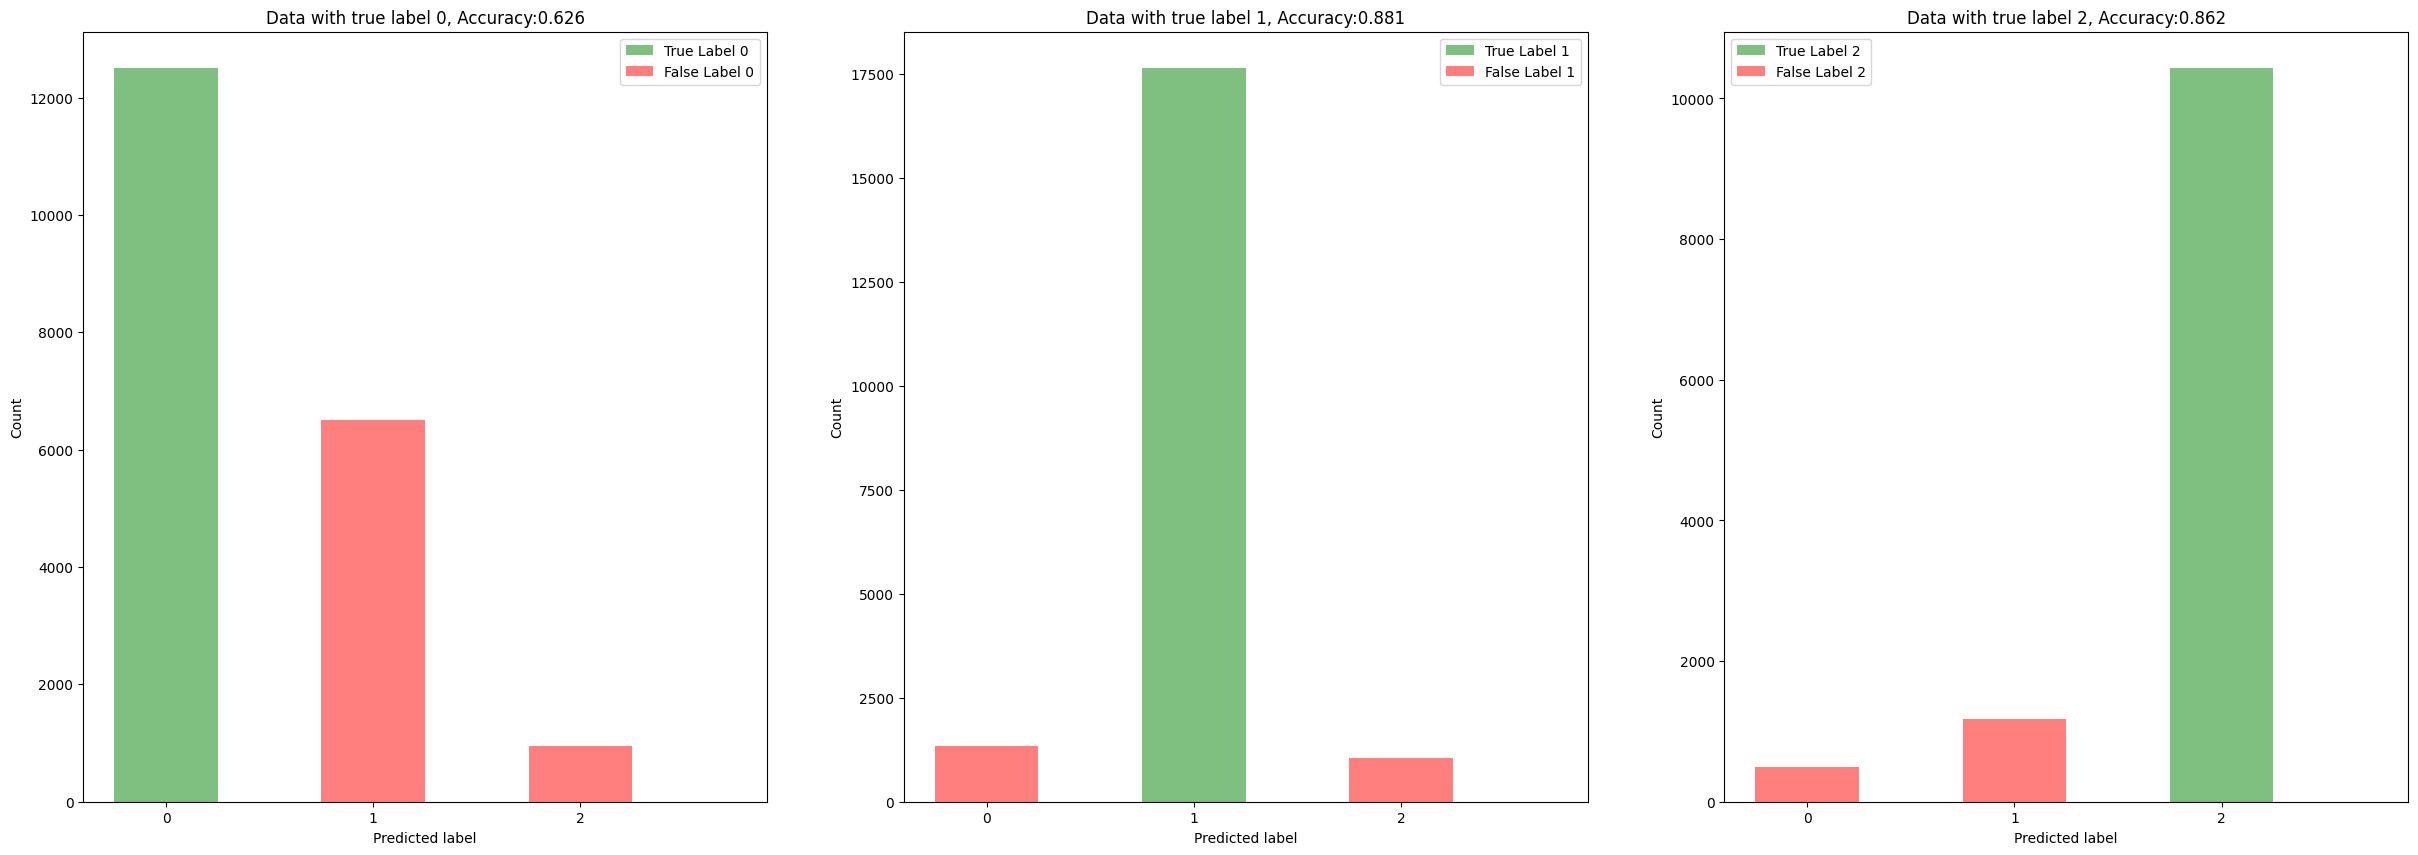

In [19]:
bins = [-0.25, 0.75, 1.75, 2.75] 
fig, ax = plt.subplots(1,3, figsize = (30,10))
for i, label in enumerate(range(3)):
    test_label = y_val[y_val==label]
    pred_label = y_pred[y_val==label]
    true_label = pred_label[pred_label == test_label]
    false_label= pred_label[pred_label != test_label]
    #print(len(false_label))
    ax[i].hist(true_label , bins = bins, histtype = 'barstacked', alpha=0.5, label='True Label ' + str(label), align = 'mid', width = 0.5, color = 'green')
    ax[i].hist(false_label, bins = bins, histtype = 'barstacked', alpha=0.5, label='False Label ' + str(label), align = 'mid', width = 0.5, color = 'red')
    #ax[i] = plt.xlabel('label')
    ax[i].set_title(f'Data with true label {i}, Accuracy:{accuracy_score(test_label, pred_label):.3f}')
    ax[i].set_xlabel(xlabel = f'Predicted label')
    ax[i].set_ylabel('Count')
    ax[i].legend()
    ax[i].set_xticks(range(3))

#plt.legend()
#plt.xlim(-0.5, 2.5)
#plt.xticks(range(3)) 

In [22]:
y_pred =  xgb_model.predict(X_val)
y_pred_train = xgb_model.predict(X_train)

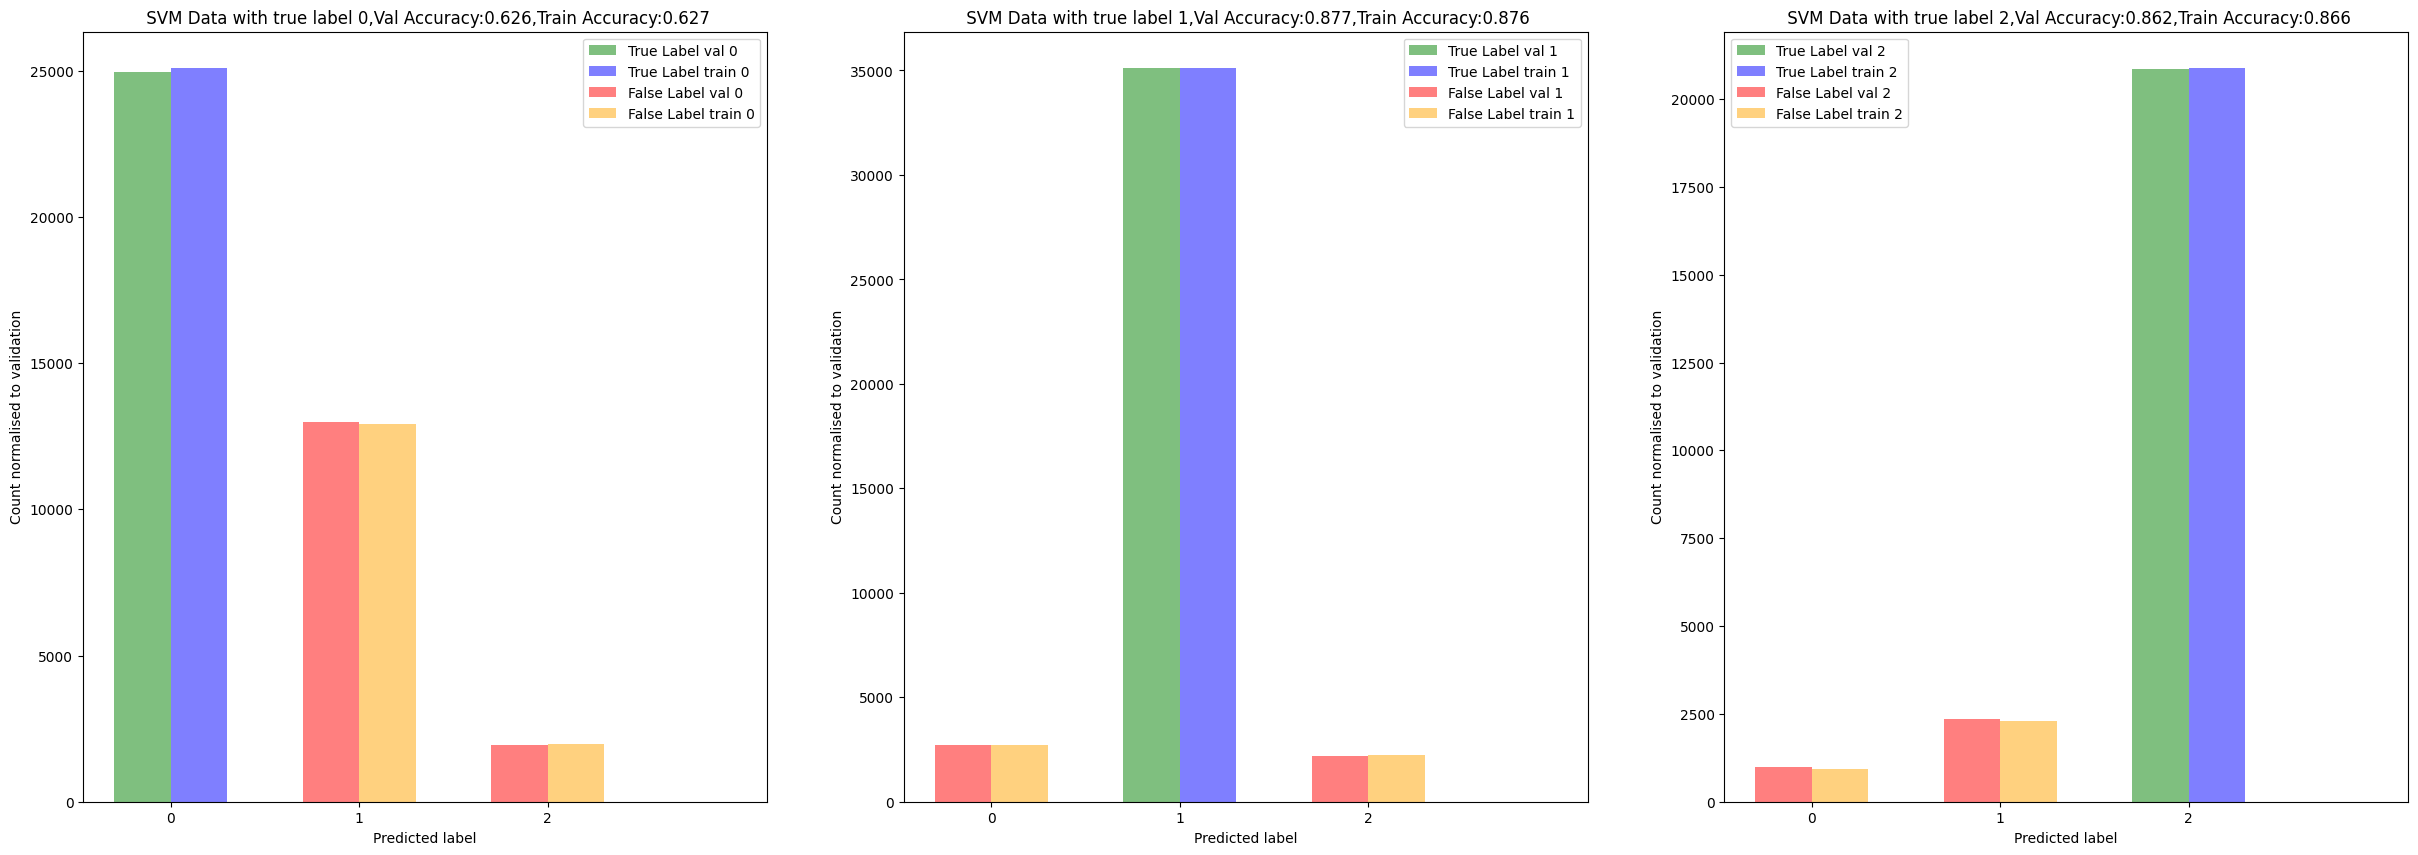

In [23]:
bins = [-0.3, 0.7, 1.7, 2.7] 
bins2 = [0, 1, 2, 3] 
fig, ax = plt.subplots(1,3, figsize = (30,10))
for i, label in enumerate(range(3)):
    test_label = y_val[y_val==label]
    pred_label = y_pred[y_val==label]
    true_label = pred_label[pred_label == test_label]
    false_label= pred_label[pred_label != test_label]
    
    test_label_t = y_train[y_train==label]
    pred_label_t = y_pred_train[y_train==label]
    true_label_t = pred_label_t[pred_label_t == test_label_t]
    false_label_t= pred_label_t[pred_label_t != test_label_t]
    #print(len(false_label))
    ax[i].hist(true_label , bins = bins, histtype = 'barstacked', alpha=0.5, label='True Label val ' + str(label), align = 'mid', width = 0.3, color = 'green')
    ax[i].hist(true_label_t[0:int(round(len(true_label_t)/3,0))] , bins = bins2, histtype = 'barstacked', alpha=0.5, label='True Label train ' + str(label), align = 'mid', width = 0.3, color = 'blue') 
    ax[i].hist(false_label, bins = bins, histtype = 'barstacked', alpha=0.5, label='False Label val ' + str(label), align = 'mid', width = 0.3, color = 'red')
    ax[i].hist(false_label_t[0:int(round(len(false_label_t)/3,0))], bins = bins2, histtype = 'barstacked', alpha=0.5, label='False Label train ' + str(label), align = 'mid', width = 0.3, color = 'orange')
    #ax[i] = plt.xlabel('label')
    ax[i].set_title(f' SVM Data with true label {i},Val Accuracy:{accuracy_score(test_label, pred_label):.3f},Train Accuracy:{accuracy_score(test_label_t, pred_label_t):.3f}')
    ax[i].set_xlabel(xlabel = f'Predicted label')
    ax[i].set_ylabel('Count normalised to validation')
    ax[i].legend()
    ax[i].set_xticks(range(3))